In [2]:
!pip install kaggle


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
## 1 - Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve ,confusion_matrix,make_scorer,accuracy_score, precision_score, recall_score, f1_score,  classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline


In [6]:
##2 -Load the dataset

pd.set_option('display.max_columns',None)
data= pd.read_csv('spambase_csv.csv')

In [7]:
##3 - Check dataset overview and balance
print("Spam Email Dataset Overview:")
print("Number of examples (emails):", data.shape[0])
print("Number of features (attributes):", data.shape[1] - 1) 
print("\nFirst few rows of the dataset:")
data.head()

Spam Email Dataset Overview:
Number of examples (emails): 4601
Number of features (attributes): 57

First few rows of the dataset:


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
4# # Step 4: Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_

In [9]:
#5: Check the balance of the dataset
class_distribution = data['class'].value_counts()
class_distribution_normalized = data['class'].value_counts(normalize=True)

print("\nClass Distribution in the Dataset:")
print(f"Number of Non-Spam Emails: {class_distribution[0]} ({class_distribution_normalized[0]:.2%})")
print(f"Number of Spam Emails: {class_distribution[1]} ({class_distribution_normalized[1]:.2%})")

is_balanced = (class_distribution_normalized[1] >= 0.4) and (class_distribution_normalized[0] >= 0.4)  # Adjust threshold as needed
balance_status = "Balanced" if is_balanced else "Imbalanced"
print(f"\nDataset Balance Status: {balance_status}") 
#need to handle imbalance later maybe SMOTE have to check evaluation matrix first


Class Distribution in the Dataset:
Number of Non-Spam Emails: 2788 (60.60%)
Number of Spam Emails: 1813 (39.40%)

Dataset Balance Status: Imbalanced


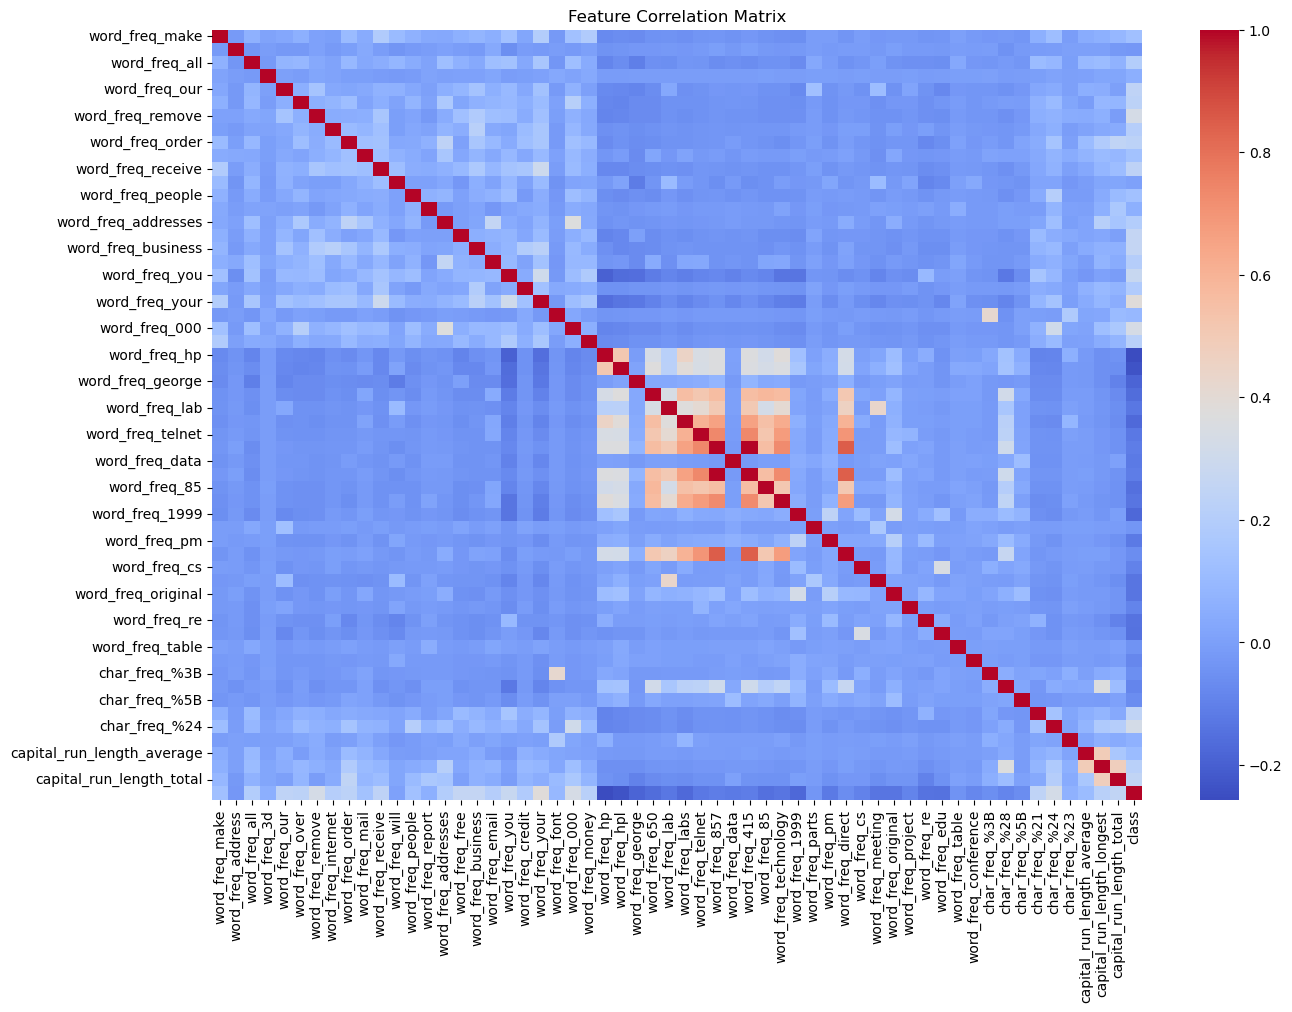


Correlation of features with the target (class 'class'):
class                         1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_%24                 0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_%21                 0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capita

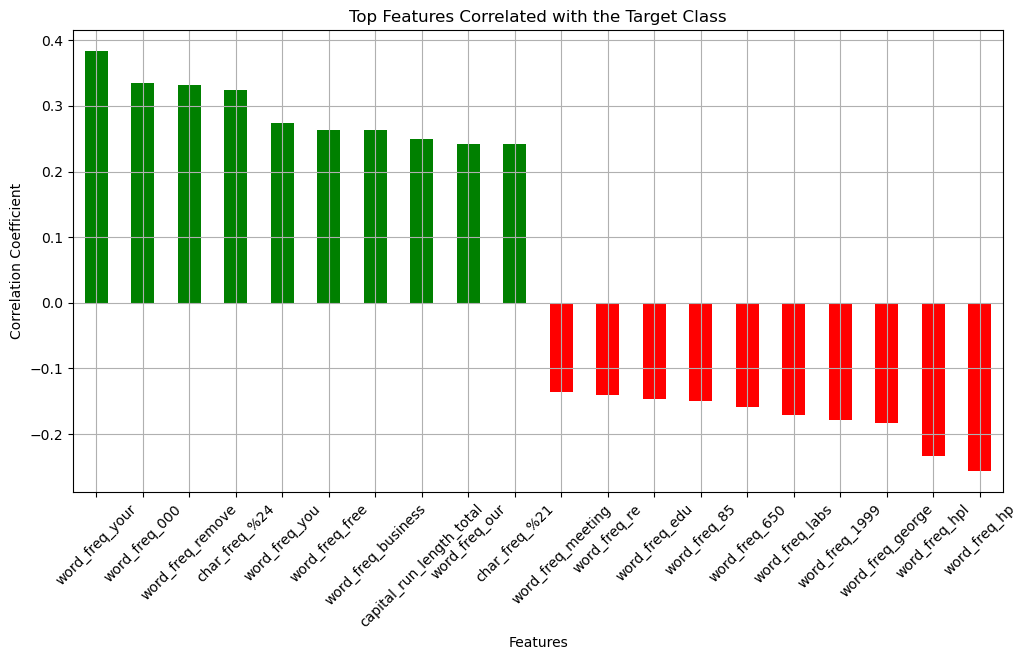

In [10]:
#6: Display correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Display correlation of features with the class 'class'
correlation_with_target = correlation_matrix['class'].sort_values(ascending=False)
print("\nCorrelation of features with the target (class 'class'):")
print(correlation_with_target)

# Select top 10 positively and negatively correlated features with 'class'
top_positive_corr = correlation_with_target.head(11)[1:]  # Excluding class
top_negative_corr = correlation_with_target.tail(10)

top_features = pd.concat([top_positive_corr, top_negative_corr])

# Plot the correlations
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color=['green' if val > 0 else 'red' for val in top_features])
plt.title('Top Features Correlated with the Target Class')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#plotting the correlation between features and class , will help selecting the right ffeatures to tune our model

In [11]:
# 7: Split data into training and test sets (70% train, 30% test)

X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nData Splits:")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Data Splits:
Training set size: (3220, 57)
Test set size: (1381, 57)


In [12]:
#  Train the Naive Bayes model : 
# we will use multinomial
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)
#prediction of the test set
y_pred = spam_detector.predict(X_test)
y_prob = spam_detector.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class


In [13]:
#Evaluation of the model 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
print("\nSpam Detector Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc_score:.4f}")



Spam Detector Evaluation Metrics:
Accuracy: 0.7820
Precision: 0.7624
Recall: 0.6950
F1 Score: 0.7271
AUC Score: 0.8553


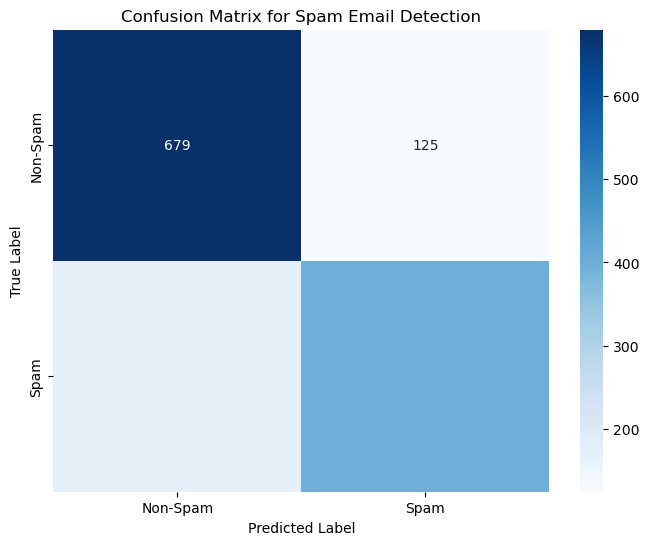


Classification Report for Spam Email Detection:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       804
           1       0.76      0.69      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381



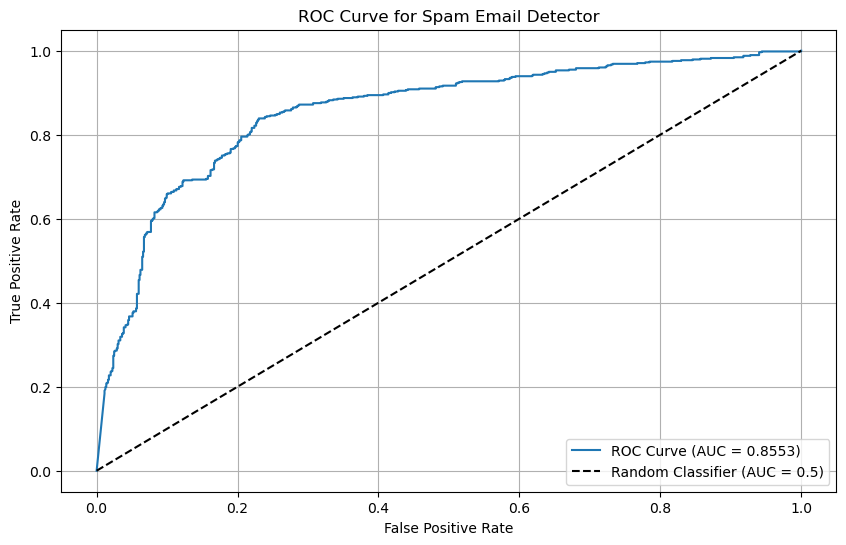

In [14]:
#visualization
#  Confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix for Spam Email Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# The  classification report
print("\nClassification Report for Spam Email Detection:")
print(classification_report(y_test, y_pred))

#  Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curve for Spam Email Detector')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

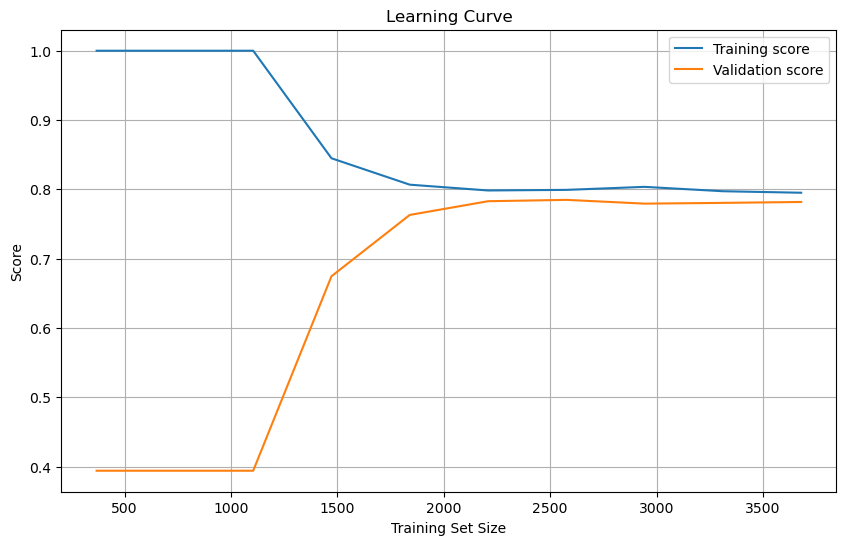

In [15]:
#Learning curve For naive bayes model
def plot_learning_curve(model, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean scores
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, validation_scores_mean, label='Validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the learning curve for the Naive Bayes model
plot_learning_curve(spam_detector, X, y)


Class distribution after applying SMOTE:
class
1    1984
0    1984
Name: count, dtype: int64
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Parameters found by GridSearchCV:
{'model__alpha': 0.1}

Improved Spam Detector Evaluation Metrics:
Accuracy: 0.7878
Precision: 0.7582
Recall: 0.7227
F1 Score: 0.7400
AUC Score: 0.8636


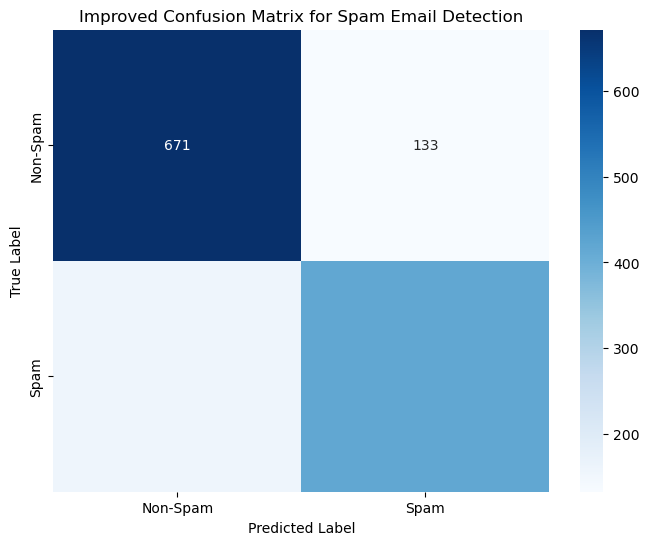


Improved Classification Report for Spam Email Detection:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       804
           1       0.76      0.72      0.74       577

    accuracy                           0.79      1381
   macro avg       0.78      0.78      0.78      1381
weighted avg       0.79      0.79      0.79      1381



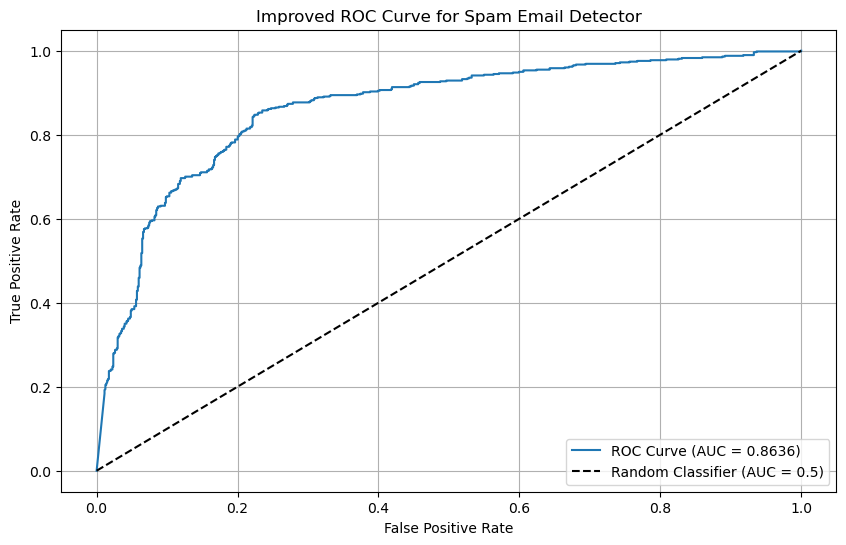

In [16]:
# Turning the model using SMOTE
# balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# pPpeline: resampling and hyperparameter tuning
pipeline = Pipeline([
    ('model', MultinomialNB())
])

# Use parameter alpha , its most common in Naive bayes
param_grid = {
    'model__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Look for the best parameters using F1 score for optimization
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),  # Use weighted F1 score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  
)

#  Training the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# e best model to make predictions and evaluate performance
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

#  Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print("\nImproved Spam Detector Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Improved Confusion Matrix for Spam Email Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\nImproved Classification Report for Spam Email Detection:")
print(classification_report(y_test, y_pred))

#  Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.title('Improved ROC Curve for Spam Email Detector')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Best Threshold for Maximum F1 Score: 0.0143

Optimized Spam Detector Evaluation Metrics:
Accuracy: 0.8038
Precision: 0.7237
Recall: 0.8579
F1 Score: 0.7851
AUC Score: 0.8636


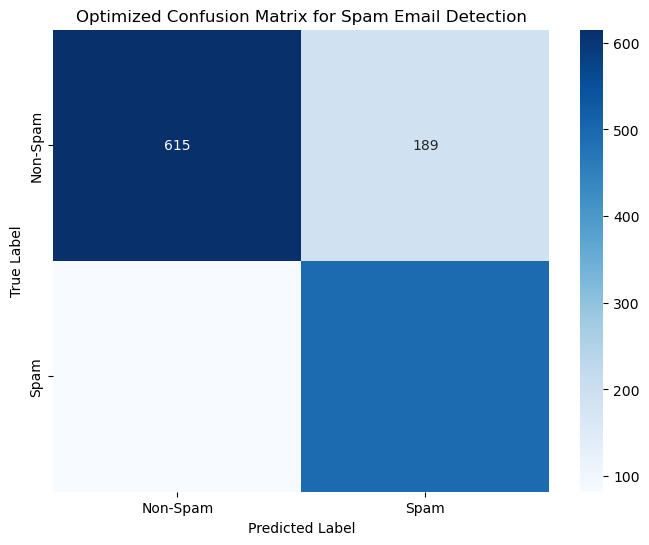


Optimized Classification Report for Spam Email Detection:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       804
           1       0.72      0.86      0.79       577

    accuracy                           0.80      1381
   macro avg       0.80      0.81      0.80      1381
weighted avg       0.82      0.80      0.81      1381



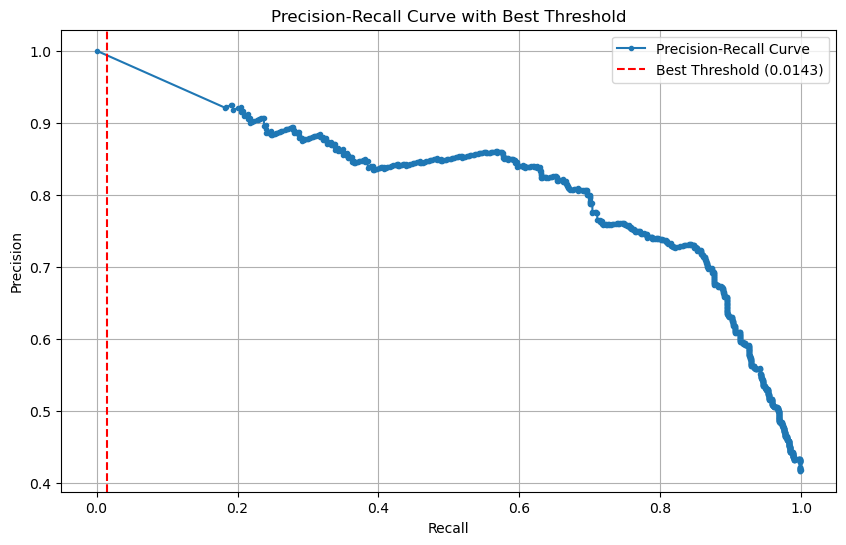

In [17]:
#Further tuning the model :Threshold turning
#maximize recall(true positive rate) and precision

# Test set predictions 
y_prob = best_model.predict_proba(X_test)[:, 1]

#  precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

#  the threshold that maximizes F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nBest Threshold for Maximum F1 Score: {best_threshold:.4f}")

#  predictions using the optimized threshold
y_pred_optimized = (y_prob >= best_threshold).astype(int)

# Evaluation 
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
auc_score_optimized = roc_auc_score(y_test, y_prob)

print("\nOptimized Spam Detector Evaluation Metrics:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"Precision: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1 Score: {f1_optimized:.4f}")
print(f"AUC Score: {auc_score_optimized:.4f}")

# Confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Optimized Confusion Matrix for Spam Email Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\nOptimized Classification Report for Spam Email Detection:")
print(classification_report(y_test, y_pred_optimized))

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold ({best_threshold:.4f})')
plt.title('Precision-Recall Curve with Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()



Decision Tree Evaluation Metrics:
Accuracy: 0.9160
Precision: 0.9276
Recall: 0.8666
F1 Score: 0.8961
AUC Score: 0.9427

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       804
           1       0.93      0.87      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



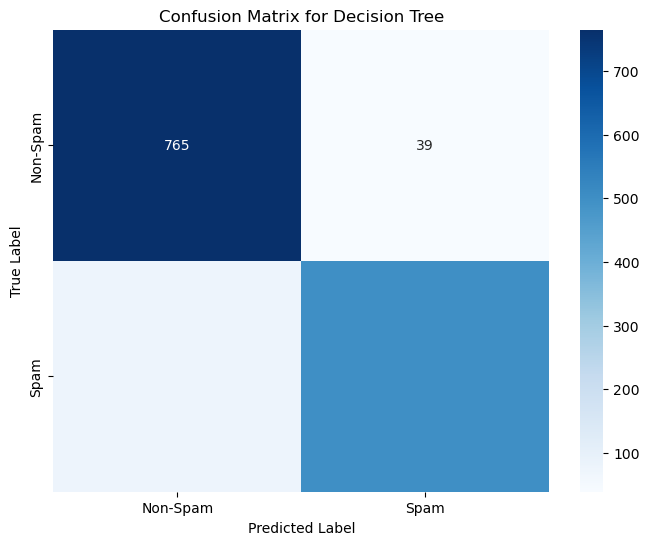

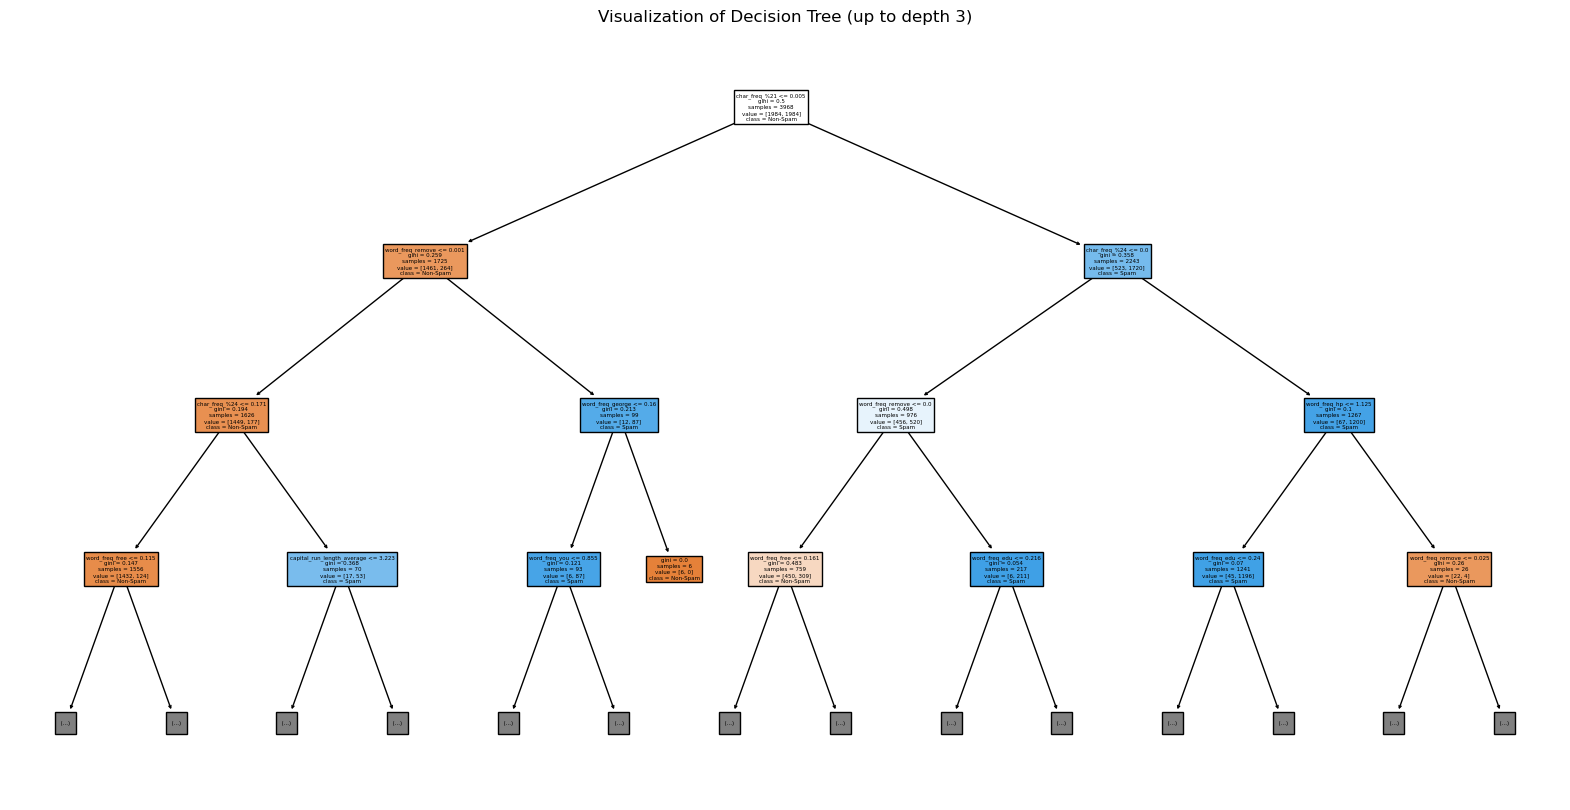


Top 10 Important Features:
                       Feature  Importance
51               char_freq_%21    0.462797
52               char_freq_%24    0.146845
6             word_freq_remove    0.130664
15              word_freq_free    0.063875
24                word_freq_hp    0.028445
54  capital_run_length_average    0.024402
56    capital_run_length_total    0.020197
16          word_freq_business    0.014318
18               word_freq_you    0.011859
4                word_freq_our    0.011561


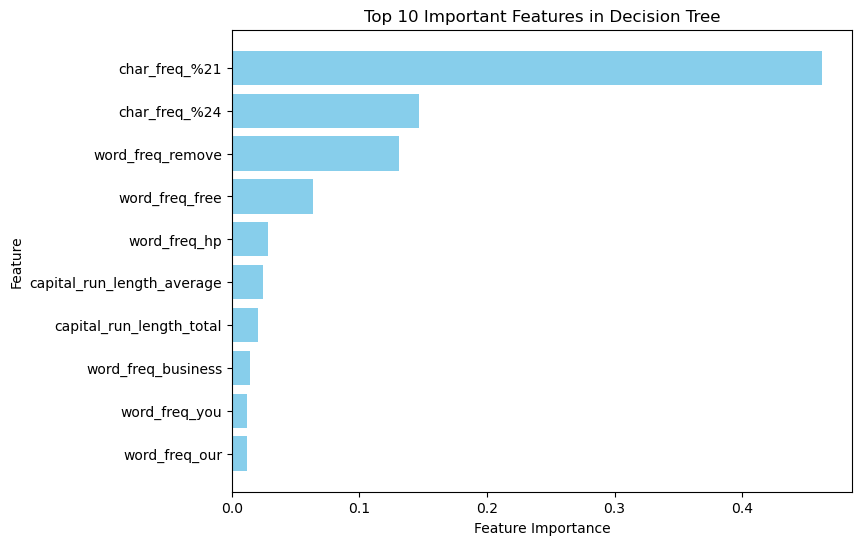

Training set class distribution:
class
0    1984
1    1236
Name: count, dtype: int64

Test set class distribution:
class
0    804
1    577
Name: count, dtype: int64
Predicted class distribution:
0    842
1    539
Name: count, dtype: int64
Unique predictions made by the model: [0 1]
True Negatives: 765
False Positives: 39
False Negatives: 77
True Positives: 500


In [17]:

#  Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    max_depth=10,  # Prune the tree to prevent overfitting
    min_samples_split=10,  # Minimum number of samples to split a node
    min_samples_leaf=5  # Minimum number of samples at a leaf node
)

#  Training the model
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Get the probability estimates for positive class

#  Evaluation 
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_score_dt = roc_auc_score(y_test, y_prob_dt)

# Print evaluation metrics
print("\nDecision Tree Evaluation Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"AUC Score: {auc_score_dt:.4f}")

# Classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Non-Spam', 'Spam'], filled=True, max_depth=3)
plt.title('Visualization of Decision Tree (up to depth 3)')
plt.show()

# Step 6: Tune and analyze feature importance
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

# Optional: Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.title('Top 10 Important Features in Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())
print("Predicted class distribution:")
print(pd.Series(y_pred_dt).value_counts())

unique_predictions = np.unique(y_pred_dt)
print("Unique predictions made by the model:", unique_predictions)

#check 
cm = confusion_matrix(y_test, y_pred_dt)
TN, FP, FN, TP = cm.ravel()
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")

